In [1]:
import pybel
import logging
import os
import networkx as nx
import nx2d3
import logging
from operator import itemgetter
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

%matplotlib inline

In [2]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("requests").setLevel(logging.WARNING)

In [3]:
time.asctime()

'Wed Oct 12 21:58:54 2016'

In [4]:
rerun = True
if os.path.exists('ad.gpickle') and not rerun:
    g = nx.read_gpickle('ad.gpickle')
else:
    g = pybel.from_path('~/.pybel/bel/AD.bel')
    nx.write_gpickle(pybel.parser.utils.flatten_edges(g), 'ad.gpickle')

INFO:pybel:Loading from path: ~/.pybel/bel/AD.bel
INFO:pybel:File length: 26340 lines
ERROR:pybel:Line 00025 - failed: 4)  Using Drugs as Molecular Probes: Enabling a “Chemical Biology" Approach in Molecular Systems Biology of the Brain Mohammad Asif Emran Khan Emon, Alpha Tom Kodamullil1, Erfan Yonesi, Reagon Karki, Shahid Mohammad, Martin Hofmann-Apitius 5) Comorbidity analysis between Alzheimer’s disease and Type 2 Diabetes Mellitus based on disease network models and the role T2DM drug: metformin in AD Reagon Karki, Alpha Tom Kodamullil, Mufassra Naz, Martin Hofmann-Apitius SET DOCUMENT Authors = "Alpha Tom Kodamullil, Reagon Karki, Mohammad Asif Emon, Mengjun Wu, Mufassra Naz, Daniel Domingo-Fernandez"
INFO:pybel:Finished parsing document section in 0.26 seconds
ERROR:pybel:Line 00052 - general failure: DEFINE NAMESPACE LMSD AS URL "https://dl.dropboxusercontent.com/u/43656618/LMSD.belns"
ERROR:pybel:Line 00071 - general failure: DEFINE NAMESPACE BRCO AS URL "http://belief.scai.fr

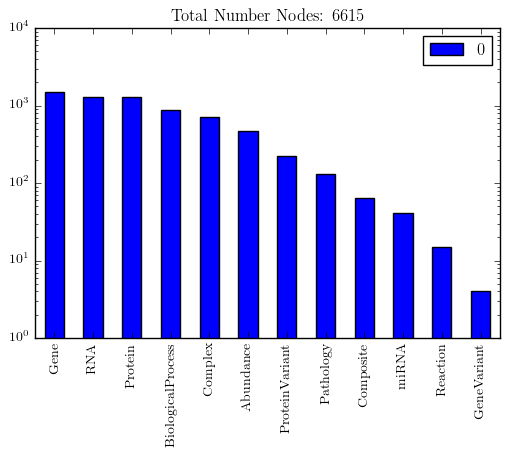

In [5]:
c = Counter(map(itemgetter(0), filter(lambda x:x,g)))
df = pd.DataFrame.from_dict(c, orient='index')
df.sort_values(0, ascending=False).plot(kind='bar', logy=True)
plt.title('Total Number Nodes: {}'.format(g.number_of_nodes()))
plt.show()

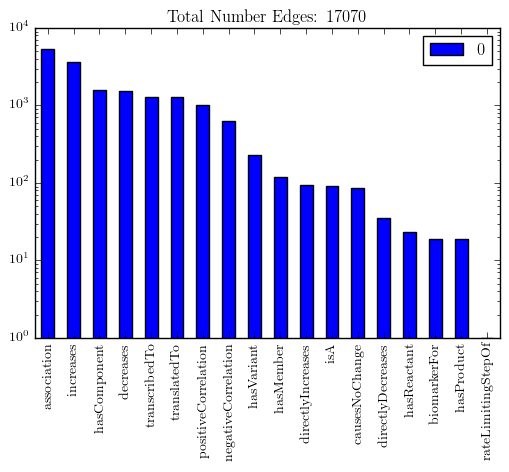

In [6]:
ec = Counter(data['relation'] for u, v, data in g.edges(data=True) if 'relation' in data)
df_ec = pd.DataFrame.from_dict(ec, orient='index')
df_ec.sort_values(0, ascending=False).plot(kind='bar', logy=True)
plt.title('Total Number Edges: {}'.format(g.number_of_edges()))
plt.show()